#Building enviroment

##Setting GPU as hardware accelerator

In [1]:
!nvidia-smi

Wed Feb 12 01:31:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

##Installing dependecies

In [2]:
!pip uninstall umap
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.2 MB/s eta 0:00:00


In [3]:
!pip install tokenizers==0.21

!pip install -q gdown inference-gpu supervision
!pip install -q git+https://github.com/roboflow/sports.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 8.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.0/976.0 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!mkdir content
!mkdir results

In [5]:
!gdown -O "content/0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
!gdown -O "content/2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf"
!gdown -O "content/08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"
!gdown -O "content/573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
!gdown -O "content/121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF
To: /content/content/0bfacc_0.mp4
100% 19.9M/19.9M [00:00<00:00, 153MB/s] 
Downloading...
From: https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf
To: /content/content/2e57b9_0.mp4
100% 21.1M/21.1M [00:00<00:00, 96.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-
To: /content/content/08fd33_0.mp4
100% 19.9M/19.9M [00:00<00:00, 102MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU
To: /content/content/573e61_0.mp4
100% 18.9M/18.9M [00:00<00:00, 139MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 179MB/s]


In [6]:
import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

# Testing system

## Ball, players, goalkeepers and referees detection

In [7]:
from inference import get_model
from google.colab import userdata

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW')
PLAYER_DETECTION_MODEL = get_model(model_id="football-players-detection-6domv/1", api_key=ROBOFLOW_API_KEY)

Creating function to process each frame

In [8]:
from tqdm import tqdm
import supervision as sv
from time import time

SOURCE_VIDEO_PATH = "content/0bfacc_0.mp4"
TARGET_VIDEO_PATH = "results/0bfacc_0_result.mp4"

BALL_ID = 0

ellipse_annotator = sv.EllipseAnnotator(
    color = sv.ColorPalette.from_hex(["#00BFFF","#FF1493",'#FFD700']),
    thickness = 2
)
label_annotator = sv.LabelAnnotator(
    color = sv.ColorPalette.from_hex(["#00BFFF","#FF1493",'#FFD700']),
    text_color=sv.Color.from_hex("#000000"),
    text_position=sv.Position.BOTTOM_CENTER
)

triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex("#FFD700"),
    base = 20, height = 17
)

tracker = sv.ByteTrack()
tracker.reset()

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

def process_frame(frame):
  start = time()
  result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
  detections = sv.Detections.from_inference(result)

  ball_detections = detections[detections.class_id == BALL_ID]
  ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy,px=10)
  all_detections = detections[detections.class_id != BALL_ID]
  all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
  all_detections.class_id = all_detections.class_id - 1
  all_detections = tracker.update_with_detections(detections=all_detections)

  labels = [
      f"#{tracker_id}"
      for tracker_id in
      all_detections.tracker_id
  ]

  annotated_frame = frame.copy()
  annotated_frame = ellipse_annotator.annotate(scene=annotated_frame, detections=all_detections)
  annotated_frame = triangle_annotator.annotate(scene=annotated_frame, detections=ball_detections)
  annotated_frame = label_annotator.annotate(annotated_frame,all_detections,labels=labels)

  print(f"Time to run: {time()-start}")

  return annotated_frame

Testing by frame to adjust the parameters

Time to run: 0.24937915802001953


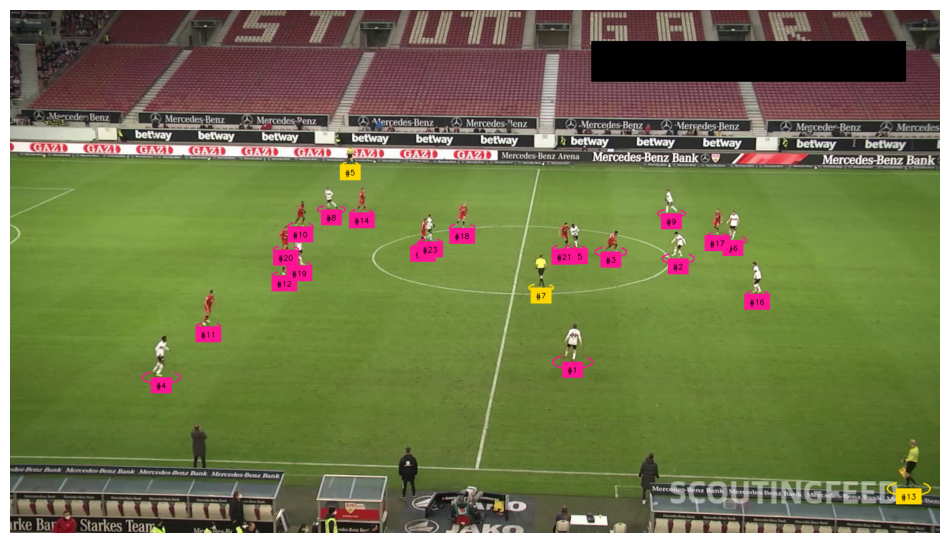

In [9]:
from tqdm import tqdm
import supervision as sv

frame = next(frame_generator)

annotated_frame = process_frame(frame)
sv.plot_image(annotated_frame)

Evaluating system in video

In [10]:
with video_sink:
  for frame in tqdm(frame_generator,total=video_info.total_frames):
    video_sink.write_frame(process_frame(frame))

  0%|          | 1/750 [00:00<03:38,  3.42it/s]

Time to run: 0.2743494510650635


  0%|          | 2/750 [00:00<03:26,  3.62it/s]

Time to run: 0.24257135391235352


  0%|          | 3/750 [00:00<03:21,  3.70it/s]

Time to run: 0.24277806282043457


  1%|          | 4/750 [00:01<03:21,  3.69it/s]

Time to run: 0.24286913871765137


  1%|          | 5/750 [00:01<03:18,  3.74it/s]

Time to run: 0.2391645908355713


  1%|          | 6/750 [00:01<03:18,  3.75it/s]

Time to run: 0.24219107627868652


  1%|          | 7/750 [00:01<03:16,  3.77it/s]

Time to run: 0.2406914234161377


  1%|          | 8/750 [00:02<03:17,  3.77it/s]

Time to run: 0.24161338806152344


  1%|          | 9/750 [00:02<03:15,  3.80it/s]

Time to run: 0.23911070823669434


  1%|▏         | 10/750 [00:02<03:14,  3.80it/s]

Time to run: 0.2402036190032959


  1%|▏         | 11/750 [00:02<03:13,  3.81it/s]

Time to run: 0.23970389366149902


  2%|▏         | 12/750 [00:03<03:14,  3.80it/s]

Time to run: 0.2411808967590332


  2%|▏         | 13/750 [00:03<03:13,  3.81it/s]

Time to run: 0.2371666431427002


  2%|▏         | 14/750 [00:03<03:13,  3.81it/s]

Time to run: 0.23970651626586914


  2%|▏         | 15/750 [00:03<03:12,  3.82it/s]

Time to run: 0.24255681037902832


  2%|▏         | 16/750 [00:04<03:10,  3.84it/s]

Time to run: 0.23920178413391113


  2%|▏         | 17/750 [00:04<03:10,  3.84it/s]

Time to run: 0.23963427543640137


  2%|▏         | 18/750 [00:04<03:12,  3.79it/s]

Time to run: 0.2468552589416504


  3%|▎         | 19/750 [00:05<03:11,  3.81it/s]

Time to run: 0.2411336898803711


  3%|▎         | 20/750 [00:05<03:15,  3.72it/s]

Time to run: 0.25226664543151855


  3%|▎         | 21/750 [00:05<03:16,  3.70it/s]

Time to run: 0.24575281143188477


  3%|▎         | 22/750 [00:05<03:22,  3.59it/s]

Time to run: 0.2687704563140869


  3%|▎         | 23/750 [00:06<03:22,  3.59it/s]

Time to run: 0.251056432723999


  3%|▎         | 24/750 [00:06<03:23,  3.57it/s]

Time to run: 0.24759364128112793


  3%|▎         | 25/750 [00:06<03:24,  3.55it/s]

Time to run: 0.25246334075927734


  3%|▎         | 26/750 [00:07<03:25,  3.53it/s]

Time to run: 0.25001072883605957


  4%|▎         | 27/750 [00:07<03:21,  3.59it/s]

Time to run: 0.24548077583312988


  4%|▎         | 28/750 [00:07<03:17,  3.65it/s]

Time to run: 0.24265551567077637


  4%|▍         | 29/750 [00:07<03:15,  3.70it/s]

Time to run: 0.2414553165435791


  4%|▍         | 30/750 [00:08<03:13,  3.72it/s]

Time to run: 0.2447044849395752


  4%|▍         | 31/750 [00:08<03:11,  3.75it/s]

Time to run: 0.23984646797180176


  4%|▍         | 32/750 [00:08<03:10,  3.77it/s]

Time to run: 0.24388861656188965


  4%|▍         | 33/750 [00:08<03:10,  3.76it/s]

Time to run: 0.24299240112304688


  5%|▍         | 34/750 [00:09<03:12,  3.72it/s]

Time to run: 0.2547340393066406


  5%|▍         | 35/750 [00:09<03:11,  3.73it/s]

Time to run: 0.24496984481811523


  5%|▍         | 36/750 [00:09<03:10,  3.75it/s]

Time to run: 0.2447822093963623


  5%|▍         | 37/750 [00:09<03:10,  3.75it/s]

Time to run: 0.24649357795715332


  5%|▌         | 38/750 [00:10<03:09,  3.75it/s]

Time to run: 0.24513649940490723


  5%|▌         | 39/750 [00:10<03:09,  3.75it/s]

Time to run: 0.2450551986694336


  5%|▌         | 40/750 [00:10<03:10,  3.72it/s]

Time to run: 0.24391889572143555


  5%|▌         | 41/750 [00:11<03:09,  3.74it/s]

Time to run: 0.2451915740966797


  6%|▌         | 42/750 [00:11<03:08,  3.75it/s]

Time to run: 0.24551749229431152


  6%|▌         | 43/750 [00:11<03:07,  3.77it/s]

Time to run: 0.24342083930969238


  6%|▌         | 44/750 [00:11<03:08,  3.75it/s]

Time to run: 0.24388718605041504


  6%|▌         | 45/750 [00:12<03:07,  3.76it/s]

Time to run: 0.2432565689086914


  6%|▌         | 46/750 [00:12<03:08,  3.74it/s]

Time to run: 0.2439894676208496


  6%|▋         | 47/750 [00:12<03:09,  3.70it/s]

Time to run: 0.2569613456726074


  6%|▋         | 48/750 [00:12<03:10,  3.68it/s]

Time to run: 0.246901273727417


  7%|▋         | 49/750 [00:13<03:09,  3.71it/s]

Time to run: 0.24349284172058105


  7%|▋         | 50/750 [00:13<03:08,  3.72it/s]

Time to run: 0.24564361572265625


  7%|▋         | 51/750 [00:13<03:06,  3.75it/s]

Time to run: 0.2406001091003418


  7%|▋         | 52/750 [00:13<03:05,  3.76it/s]

Time to run: 0.23961234092712402


  7%|▋         | 53/750 [00:14<03:07,  3.73it/s]

Time to run: 0.25432562828063965


  7%|▋         | 54/750 [00:14<03:05,  3.75it/s]

Time to run: 0.24342799186706543


  7%|▋         | 55/750 [00:14<03:05,  3.75it/s]

Time to run: 0.24231243133544922


  7%|▋         | 56/750 [00:15<03:04,  3.76it/s]

Time to run: 0.24584650993347168


  8%|▊         | 57/750 [00:15<03:04,  3.77it/s]

Time to run: 0.24446654319763184


  8%|▊         | 58/750 [00:15<03:05,  3.72it/s]

Time to run: 0.25592780113220215


  8%|▊         | 59/750 [00:15<03:05,  3.73it/s]

Time to run: 0.24349737167358398


  8%|▊         | 60/750 [00:16<03:04,  3.74it/s]

Time to run: 0.2467350959777832


  8%|▊         | 61/750 [00:16<03:04,  3.74it/s]

Time to run: 0.24328947067260742


  8%|▊         | 62/750 [00:16<03:04,  3.73it/s]

Time to run: 0.2462143898010254


  8%|▊         | 63/750 [00:16<03:03,  3.74it/s]

Time to run: 0.24329352378845215


  9%|▊         | 64/750 [00:17<03:03,  3.74it/s]

Time to run: 0.24602508544921875


  9%|▊         | 65/750 [00:17<03:06,  3.68it/s]

Time to run: 0.24956035614013672


  9%|▉         | 66/750 [00:17<03:13,  3.53it/s]

Time to run: 0.2669334411621094


  9%|▉         | 67/750 [00:18<03:14,  3.52it/s]

Time to run: 0.25403904914855957


  9%|▉         | 68/750 [00:18<03:15,  3.49it/s]

Time to run: 0.2501835823059082


  9%|▉         | 69/750 [00:18<03:18,  3.43it/s]

Time to run: 0.2720930576324463


  9%|▉         | 70/750 [00:18<03:19,  3.41it/s]

Time to run: 0.2568674087524414


  9%|▉         | 71/750 [00:19<03:22,  3.35it/s]

Time to run: 0.2647716999053955


 10%|▉         | 72/750 [00:19<03:20,  3.37it/s]

Time to run: 0.2573883533477783


 10%|▉         | 73/750 [00:19<03:16,  3.44it/s]

Time to run: 0.2494039535522461


 10%|▉         | 74/750 [00:20<03:14,  3.48it/s]

Time to run: 0.2547941207885742


 10%|█         | 75/750 [00:20<03:12,  3.51it/s]

Time to run: 0.25235986709594727


 10%|█         | 76/750 [00:20<03:09,  3.55it/s]

Time to run: 0.2513422966003418


 10%|█         | 77/750 [00:20<03:07,  3.59it/s]

Time to run: 0.24728965759277344


 10%|█         | 78/750 [00:21<03:07,  3.59it/s]

Time to run: 0.25299739837646484


 11%|█         | 79/750 [00:21<03:05,  3.63it/s]

Time to run: 0.24657845497131348


 11%|█         | 80/750 [00:21<03:03,  3.64it/s]

Time to run: 0.24711251258850098


 11%|█         | 81/750 [00:22<03:02,  3.67it/s]

Time to run: 0.24482464790344238


 11%|█         | 82/750 [00:22<03:01,  3.68it/s]

Time to run: 0.2482929229736328


 11%|█         | 83/750 [00:22<03:00,  3.69it/s]

Time to run: 0.250917911529541


 11%|█         | 84/750 [00:22<03:00,  3.70it/s]

Time to run: 0.2480776309967041


 11%|█▏        | 85/750 [00:23<03:00,  3.69it/s]

Time to run: 0.24775934219360352


 11%|█▏        | 86/750 [00:23<02:56,  3.75it/s]

Time to run: 0.23032021522521973


 12%|█▏        | 87/750 [00:23<02:56,  3.75it/s]

Time to run: 0.24419188499450684


 12%|█▏        | 88/750 [00:23<02:57,  3.73it/s]

Time to run: 0.24605298042297363


 12%|█▏        | 89/750 [00:24<02:59,  3.69it/s]

Time to run: 0.2525317668914795


 12%|█▏        | 90/750 [00:24<02:58,  3.69it/s]

Time to run: 0.24619555473327637


 12%|█▏        | 91/750 [00:24<02:57,  3.70it/s]

Time to run: 0.24486279487609863


 12%|█▏        | 92/750 [00:24<02:56,  3.73it/s]

Time to run: 0.2379908561706543


 12%|█▏        | 93/750 [00:25<02:56,  3.72it/s]

Time to run: 0.24248123168945312


 13%|█▎        | 94/750 [00:25<02:58,  3.68it/s]

Time to run: 0.25878357887268066


 13%|█▎        | 95/750 [00:25<02:57,  3.69it/s]

Time to run: 0.24426794052124023


 13%|█▎        | 96/750 [00:26<02:57,  3.69it/s]

Time to run: 0.24893689155578613


 13%|█▎        | 97/750 [00:26<02:59,  3.63it/s]

Time to run: 0.2587447166442871


 13%|█▎        | 98/750 [00:26<02:58,  3.66it/s]

Time to run: 0.24789643287658691


 13%|█▎        | 99/750 [00:26<02:56,  3.68it/s]

Time to run: 0.24465703964233398


 13%|█▎        | 100/750 [00:27<02:56,  3.68it/s]

Time to run: 0.25074076652526855


 13%|█▎        | 101/750 [00:27<02:55,  3.69it/s]

Time to run: 0.2476367950439453


 14%|█▎        | 102/750 [00:27<02:58,  3.64it/s]

Time to run: 0.2589249610900879


 14%|█▎        | 103/750 [00:27<02:55,  3.68it/s]

Time to run: 0.24474382400512695


 14%|█▍        | 104/750 [00:28<02:55,  3.69it/s]

Time to run: 0.24845075607299805


 14%|█▍        | 105/750 [00:28<02:54,  3.69it/s]

Time to run: 0.2491450309753418


 14%|█▍        | 106/750 [00:28<02:55,  3.67it/s]

Time to run: 0.24961185455322266


 14%|█▍        | 107/750 [00:29<02:55,  3.67it/s]

Time to run: 0.25203371047973633


 14%|█▍        | 108/750 [00:29<02:55,  3.65it/s]

Time to run: 0.24995899200439453


 15%|█▍        | 109/750 [00:29<03:01,  3.53it/s]

Time to run: 0.26293516159057617


 15%|█▍        | 110/750 [00:29<03:03,  3.48it/s]

Time to run: 0.2660830020904541


 15%|█▍        | 111/750 [00:30<03:06,  3.43it/s]

Time to run: 0.25790882110595703


 15%|█▍        | 112/750 [00:30<03:05,  3.43it/s]

Time to run: 0.2567481994628906


 15%|█▌        | 113/750 [00:30<03:07,  3.40it/s]

Time to run: 0.2552158832550049


 15%|█▌        | 114/750 [00:31<03:09,  3.35it/s]

Time to run: 0.2734801769256592


 15%|█▌        | 115/750 [00:31<03:11,  3.32it/s]

Time to run: 0.26085758209228516


 15%|█▌        | 116/750 [00:31<03:07,  3.39it/s]

Time to run: 0.2584574222564697


 16%|█▌        | 117/750 [00:31<03:02,  3.48it/s]

Time to run: 0.25006985664367676


 16%|█▌        | 118/750 [00:32<03:00,  3.50it/s]

Time to run: 0.2618081569671631


 16%|█▌        | 119/750 [00:32<02:58,  3.53it/s]

Time to run: 0.25026512145996094


 16%|█▌        | 120/750 [00:32<02:56,  3.56it/s]

Time to run: 0.25514984130859375


 16%|█▌        | 121/750 [00:33<02:56,  3.55it/s]

Time to run: 0.26123046875


 16%|█▋        | 122/750 [00:33<02:56,  3.55it/s]

Time to run: 0.25804662704467773


 16%|█▋        | 123/750 [00:33<02:55,  3.58it/s]

Time to run: 0.2517569065093994


 17%|█▋        | 124/750 [00:33<02:54,  3.59it/s]

Time to run: 0.2566509246826172


 17%|█▋        | 125/750 [00:34<02:52,  3.62it/s]

Time to run: 0.24897098541259766


 17%|█▋        | 126/750 [00:34<02:51,  3.64it/s]

Time to run: 0.24973082542419434


 17%|█▋        | 127/750 [00:34<02:52,  3.62it/s]

Time to run: 0.253936767578125


 17%|█▋        | 128/750 [00:35<02:50,  3.65it/s]

Time to run: 0.2458820343017578


 17%|█▋        | 129/750 [00:35<02:48,  3.68it/s]

Time to run: 0.2469348907470703


 17%|█▋        | 130/750 [00:35<02:48,  3.68it/s]

Time to run: 0.24799108505249023


 17%|█▋        | 131/750 [00:35<02:48,  3.68it/s]

Time to run: 0.25078368186950684


 18%|█▊        | 132/750 [00:36<02:49,  3.65it/s]

Time to run: 0.2545945644378662


 18%|█▊        | 133/750 [00:36<02:48,  3.67it/s]

Time to run: 0.24949145317077637


 18%|█▊        | 134/750 [00:36<02:48,  3.65it/s]

Time to run: 0.2509152889251709


 18%|█▊        | 135/750 [00:36<02:48,  3.66it/s]

Time to run: 0.24905872344970703


 18%|█▊        | 136/750 [00:37<02:48,  3.64it/s]

Time to run: 0.24942278861999512


 18%|█▊        | 137/750 [00:37<02:48,  3.65it/s]

Time to run: 0.2513539791107178


 18%|█▊        | 138/750 [00:37<02:49,  3.60it/s]

Time to run: 0.26093268394470215


 19%|█▊        | 139/750 [00:38<02:48,  3.63it/s]

Time to run: 0.25184035301208496


 19%|█▊        | 140/750 [00:38<02:47,  3.64it/s]

Time to run: 0.24668121337890625


 19%|█▉        | 141/750 [00:38<02:46,  3.66it/s]

Time to run: 0.25150156021118164


 19%|█▉        | 142/750 [00:38<02:46,  3.66it/s]

Time to run: 0.24779152870178223


 19%|█▉        | 143/750 [00:39<02:45,  3.67it/s]

Time to run: 0.2485027313232422


 19%|█▉        | 144/750 [00:39<02:44,  3.68it/s]

Time to run: 0.24912238121032715


 19%|█▉        | 145/750 [00:39<02:46,  3.64it/s]

Time to run: 0.25633978843688965


 19%|█▉        | 146/750 [00:39<02:45,  3.65it/s]

Time to run: 0.25360727310180664


 20%|█▉        | 147/750 [00:40<02:45,  3.65it/s]

Time to run: 0.2492072582244873


 20%|█▉        | 148/750 [00:40<02:44,  3.65it/s]

Time to run: 0.25146055221557617


 20%|█▉        | 149/750 [00:40<02:41,  3.72it/s]

Time to run: 0.230072021484375


 20%|██        | 150/750 [00:41<02:42,  3.69it/s]

Time to run: 0.24937081336975098


 20%|██        | 151/750 [00:41<02:42,  3.68it/s]

Time to run: 0.2498776912689209


 20%|██        | 152/750 [00:41<02:46,  3.60it/s]

Time to run: 0.2537052631378174


 20%|██        | 153/750 [00:41<02:48,  3.53it/s]

Time to run: 0.25543665885925293


 21%|██        | 154/750 [00:42<02:49,  3.51it/s]

Time to run: 0.260329008102417


 21%|██        | 155/750 [00:42<02:48,  3.52it/s]

Time to run: 0.2563498020172119


 21%|██        | 156/750 [00:42<02:52,  3.43it/s]

Time to run: 0.2648322582244873


 21%|██        | 157/750 [00:43<02:57,  3.34it/s]

Time to run: 0.28744935989379883


 21%|██        | 158/750 [00:43<02:59,  3.30it/s]

Time to run: 0.2732124328613281


 21%|██        | 159/750 [00:43<02:55,  3.37it/s]

Time to run: 0.25493335723876953


 21%|██▏       | 160/750 [00:43<02:50,  3.46it/s]

Time to run: 0.2506427764892578


 21%|██▏       | 161/750 [00:44<02:42,  3.62it/s]

Time to run: 0.22341656684875488


 22%|██▏       | 162/750 [00:44<02:45,  3.56it/s]

Time to run: 0.27233219146728516


 22%|██▏       | 163/750 [00:44<02:43,  3.58it/s]

Time to run: 0.2557413578033447


 22%|██▏       | 164/750 [00:45<02:43,  3.59it/s]

Time to run: 0.258636474609375


 22%|██▏       | 165/750 [00:45<02:41,  3.62it/s]

Time to run: 0.25325870513916016


 22%|██▏       | 166/750 [00:45<02:40,  3.63it/s]

Time to run: 0.25360822677612305


 22%|██▏       | 167/750 [00:45<02:41,  3.61it/s]

Time to run: 0.2623882293701172


 22%|██▏       | 168/750 [00:46<02:40,  3.63it/s]

Time to run: 0.2525758743286133


 23%|██▎       | 169/750 [00:46<02:39,  3.64it/s]

Time to run: 0.2545948028564453


 23%|██▎       | 170/750 [00:46<02:38,  3.65it/s]

Time to run: 0.2508509159088135


 23%|██▎       | 171/750 [00:46<02:39,  3.63it/s]

Time to run: 0.25777530670166016


 23%|██▎       | 172/750 [00:47<02:38,  3.64it/s]

Time to run: 0.252335786819458


 23%|██▎       | 173/750 [00:47<02:37,  3.67it/s]

Time to run: 0.24922704696655273


 23%|██▎       | 174/750 [00:47<02:37,  3.67it/s]

Time to run: 0.254009485244751


 23%|██▎       | 175/750 [00:48<02:36,  3.67it/s]

Time to run: 0.2544994354248047


 23%|██▎       | 176/750 [00:48<02:36,  3.66it/s]

Time to run: 0.2524704933166504


 24%|██▎       | 177/750 [00:48<02:37,  3.63it/s]

Time to run: 0.25724363327026367


 24%|██▎       | 178/750 [00:48<02:37,  3.63it/s]

Time to run: 0.2556459903717041


 24%|██▍       | 179/750 [00:49<02:38,  3.59it/s]

Time to run: 0.2593510150909424


 24%|██▍       | 180/750 [00:49<02:37,  3.62it/s]

Time to run: 0.2503781318664551


 24%|██▍       | 181/750 [00:49<02:37,  3.62it/s]

Time to run: 0.24984240531921387


 24%|██▍       | 182/750 [00:49<02:37,  3.61it/s]

Time to run: 0.25586986541748047


 24%|██▍       | 183/750 [00:50<02:37,  3.60it/s]

Time to run: 0.25888752937316895


 25%|██▍       | 184/750 [00:50<02:36,  3.62it/s]

Time to run: 0.24996542930603027


 25%|██▍       | 185/750 [00:50<02:35,  3.63it/s]

Time to run: 0.2513151168823242


 25%|██▍       | 186/750 [00:51<02:35,  3.63it/s]

Time to run: 0.25298476219177246


 25%|██▍       | 187/750 [00:51<02:35,  3.63it/s]

Time to run: 0.2535998821258545


 25%|██▌       | 188/750 [00:51<02:35,  3.62it/s]

Time to run: 0.2550780773162842


 25%|██▌       | 189/750 [00:51<02:36,  3.58it/s]

Time to run: 0.2626326084136963


 25%|██▌       | 190/750 [00:52<02:35,  3.60it/s]

Time to run: 0.254441499710083


 25%|██▌       | 191/750 [00:52<02:34,  3.61it/s]

Time to run: 0.2521097660064697


 26%|██▌       | 192/750 [00:52<02:34,  3.61it/s]

Time to run: 0.2566673755645752


 26%|██▌       | 193/750 [00:53<02:36,  3.56it/s]

Time to run: 0.2692854404449463


 26%|██▌       | 194/750 [00:53<02:37,  3.54it/s]

Time to run: 0.2592275142669678


 26%|██▌       | 195/750 [00:53<02:38,  3.51it/s]

Time to run: 0.26291799545288086


 26%|██▌       | 196/750 [00:53<02:40,  3.46it/s]

Time to run: 0.2669689655303955


 26%|██▋       | 197/750 [00:54<02:43,  3.39it/s]

Time to run: 0.26499319076538086


 26%|██▋       | 198/750 [00:54<02:45,  3.34it/s]

Time to run: 0.27031755447387695


 27%|██▋       | 199/750 [00:54<02:46,  3.31it/s]

Time to run: 0.2678341865539551


 27%|██▋       | 200/750 [00:55<02:46,  3.29it/s]

Time to run: 0.2671701908111572


 27%|██▋       | 201/750 [00:55<02:48,  3.25it/s]

Time to run: 0.2726616859436035


 27%|██▋       | 202/750 [00:55<02:48,  3.25it/s]

Time to run: 0.2743651866912842


 27%|██▋       | 203/750 [00:56<02:42,  3.36it/s]

Time to run: 0.25389981269836426


 27%|██▋       | 204/750 [00:56<02:40,  3.41it/s]

Time to run: 0.25892019271850586


 27%|██▋       | 205/750 [00:56<02:38,  3.43it/s]

Time to run: 0.2675347328186035


 27%|██▋       | 206/750 [00:56<02:36,  3.47it/s]

Time to run: 0.25873684883117676


 28%|██▊       | 207/750 [00:57<02:34,  3.50it/s]

Time to run: 0.25960206985473633


 28%|██▊       | 208/750 [00:57<02:33,  3.54it/s]

Time to run: 0.25794219970703125


 28%|██▊       | 209/750 [00:57<02:32,  3.55it/s]

Time to run: 0.2591531276702881


 28%|██▊       | 210/750 [00:58<02:31,  3.56it/s]

Time to run: 0.2583019733428955


 28%|██▊       | 211/750 [00:58<02:31,  3.56it/s]

Time to run: 0.26296401023864746


 28%|██▊       | 212/750 [00:58<02:31,  3.54it/s]

Time to run: 0.26290082931518555


 28%|██▊       | 213/750 [00:58<02:32,  3.53it/s]

Time to run: 0.2671468257904053


 29%|██▊       | 214/750 [00:59<02:31,  3.54it/s]

Time to run: 0.25951361656188965


 29%|██▊       | 215/750 [00:59<02:31,  3.54it/s]

Time to run: 0.26253557205200195


 29%|██▉       | 216/750 [00:59<02:31,  3.52it/s]

Time to run: 0.2689499855041504


 29%|██▉       | 217/750 [01:00<02:30,  3.53it/s]

Time to run: 0.25989603996276855


 29%|██▉       | 218/750 [01:00<02:30,  3.54it/s]

Time to run: 0.26175832748413086


 29%|██▉       | 219/750 [01:00<02:29,  3.56it/s]

Time to run: 0.25940918922424316


 29%|██▉       | 220/750 [01:00<02:27,  3.59it/s]

Time to run: 0.25610876083374023


 29%|██▉       | 221/750 [01:01<02:28,  3.57it/s]

Time to run: 0.2571895122528076


 30%|██▉       | 222/750 [01:01<02:29,  3.54it/s]

Time to run: 0.26631808280944824


 30%|██▉       | 223/750 [01:01<02:27,  3.56it/s]

Time to run: 0.2551090717315674


 30%|██▉       | 224/750 [01:01<02:27,  3.56it/s]

Time to run: 0.25565624237060547


 30%|███       | 225/750 [01:02<02:27,  3.55it/s]

Time to run: 0.2589380741119385


 30%|███       | 226/750 [01:02<02:27,  3.55it/s]

Time to run: 0.2575042247772217


 30%|███       | 227/750 [01:02<02:25,  3.60it/s]

Time to run: 0.2516012191772461


 30%|███       | 228/750 [01:03<02:26,  3.56it/s]

Time to run: 0.25976991653442383


 31%|███       | 229/750 [01:03<02:26,  3.56it/s]

Time to run: 0.2560608386993408


 31%|███       | 230/750 [01:03<02:26,  3.55it/s]

Time to run: 0.2645580768585205


 31%|███       | 231/750 [01:03<02:28,  3.50it/s]

Time to run: 0.26639652252197266


 31%|███       | 232/750 [01:04<02:27,  3.52it/s]

Time to run: 0.24689888954162598


 31%|███       | 233/750 [01:04<02:39,  3.24it/s]

Time to run: 0.2821955680847168


 31%|███       | 234/750 [01:05<02:55,  2.93it/s]

Time to run: 0.3405110836029053


 31%|███▏      | 235/750 [01:05<02:50,  3.01it/s]

Time to run: 0.2685410976409912


 31%|███▏      | 236/750 [01:05<02:58,  2.87it/s]

Time to run: 0.3126401901245117


 32%|███▏      | 237/750 [01:06<02:58,  2.88it/s]

Time to run: 0.2889058589935303


 32%|███▏      | 238/750 [01:06<03:08,  2.72it/s]

Time to run: 0.31850481033325195


 32%|███▏      | 239/750 [01:06<03:20,  2.55it/s]

Time to run: 0.3722703456878662


 32%|███▏      | 240/750 [01:07<03:17,  2.58it/s]

Time to run: 0.334120512008667


 32%|███▏      | 241/750 [01:07<03:15,  2.61it/s]

Time to run: 0.333845853805542


 32%|███▏      | 242/750 [01:08<03:16,  2.59it/s]

Time to run: 0.307234525680542


 32%|███▏      | 243/750 [01:08<03:19,  2.54it/s]

Time to run: 0.350541353225708


 33%|███▎      | 244/750 [01:08<03:08,  2.68it/s]

Time to run: 0.2754359245300293


 33%|███▎      | 245/750 [01:09<03:04,  2.74it/s]

Time to run: 0.2983551025390625


 33%|███▎      | 246/750 [01:09<03:04,  2.74it/s]

Time to run: 0.31558895111083984


 33%|███▎      | 247/750 [01:09<03:12,  2.61it/s]

Time to run: 0.3767368793487549


 33%|███▎      | 248/750 [01:10<03:05,  2.71it/s]

Time to run: 0.29079699516296387


 33%|███▎      | 249/750 [01:10<03:05,  2.70it/s]

Time to run: 0.3215317726135254


 33%|███▎      | 250/750 [01:10<02:57,  2.82it/s]

Time to run: 0.2832512855529785


 33%|███▎      | 251/750 [01:11<02:49,  2.94it/s]

Time to run: 0.26790833473205566


 34%|███▎      | 252/750 [01:11<02:46,  2.99it/s]

Time to run: 0.279308557510376


 34%|███▎      | 253/750 [01:11<02:41,  3.08it/s]

Time to run: 0.26320672035217285


 34%|███▍      | 254/750 [01:12<02:47,  2.95it/s]

Time to run: 0.3119955062866211


 34%|███▍      | 255/750 [01:12<02:48,  2.94it/s]

Time to run: 0.3040883541107178


 34%|███▍      | 256/750 [01:12<02:47,  2.95it/s]

Time to run: 0.29870080947875977


 34%|███▍      | 257/750 [01:13<02:53,  2.84it/s]

Time to run: 0.2937278747558594


 34%|███▍      | 258/750 [01:13<03:12,  2.55it/s]

Time to run: 0.35750627517700195


 35%|███▍      | 259/750 [01:14<03:12,  2.55it/s]

Time to run: 0.33559226989746094


 35%|███▍      | 260/750 [01:14<03:14,  2.53it/s]

Time to run: 0.30152368545532227


 35%|███▍      | 261/750 [01:14<03:06,  2.62it/s]

Time to run: 0.3076155185699463


 35%|███▍      | 262/750 [01:15<02:55,  2.79it/s]

Time to run: 0.26923561096191406


 35%|███▌      | 263/750 [01:15<02:51,  2.84it/s]

Time to run: 0.2789618968963623


 35%|███▌      | 264/750 [01:16<03:05,  2.61it/s]

Time to run: 0.35562872886657715


 35%|███▌      | 265/750 [01:16<02:56,  2.75it/s]

Time to run: 0.29212117195129395


 35%|███▌      | 266/750 [01:16<02:44,  2.95it/s]

Time to run: 0.26131272315979004


 36%|███▌      | 267/750 [01:16<02:34,  3.12it/s]

Time to run: 0.25963473320007324


 36%|███▌      | 268/750 [01:17<02:29,  3.22it/s]

Time to run: 0.2665903568267822


 36%|███▌      | 269/750 [01:17<02:27,  3.26it/s]

Time to run: 0.27488160133361816


 36%|███▌      | 270/750 [01:17<02:23,  3.35it/s]

Time to run: 0.26052403450012207


 36%|███▌      | 271/750 [01:18<02:20,  3.41it/s]

Time to run: 0.260392427444458


 36%|███▋      | 272/750 [01:18<02:20,  3.40it/s]

Time to run: 0.26717114448547363


 36%|███▋      | 273/750 [01:18<02:21,  3.38it/s]

Time to run: 0.2669956684112549


 37%|███▋      | 274/750 [01:18<02:20,  3.38it/s]

Time to run: 0.2688932418823242


 37%|███▋      | 275/750 [01:19<02:22,  3.34it/s]

Time to run: 0.28038978576660156


 37%|███▋      | 276/750 [01:19<02:21,  3.34it/s]

Time to run: 0.27156686782836914


 37%|███▋      | 277/750 [01:19<02:24,  3.26it/s]

Time to run: 0.27210092544555664


 37%|███▋      | 278/750 [01:20<02:26,  3.22it/s]

Time to run: 0.2761118412017822


 37%|███▋      | 279/750 [01:20<02:28,  3.17it/s]

Time to run: 0.2767651081085205


 37%|███▋      | 280/750 [01:20<02:27,  3.19it/s]

Time to run: 0.2750880718231201


 37%|███▋      | 281/750 [01:21<02:24,  3.24it/s]

Time to run: 0.2687869071960449


 38%|███▊      | 282/750 [01:21<02:22,  3.28it/s]

Time to run: 0.2638235092163086


 38%|███▊      | 283/750 [01:21<02:19,  3.34it/s]

Time to run: 0.2652316093444824


 38%|███▊      | 284/750 [01:22<02:17,  3.38it/s]

Time to run: 0.26403212547302246


 38%|███▊      | 285/750 [01:22<02:15,  3.43it/s]

Time to run: 0.26346874237060547


 38%|███▊      | 286/750 [01:22<02:14,  3.46it/s]

Time to run: 0.2604813575744629


 38%|███▊      | 287/750 [01:22<02:13,  3.47it/s]

Time to run: 0.2639927864074707


 38%|███▊      | 288/750 [01:23<02:12,  3.48it/s]

Time to run: 0.2615840435028076


 39%|███▊      | 289/750 [01:23<02:11,  3.50it/s]

Time to run: 0.26068639755249023


 39%|███▊      | 290/750 [01:23<02:11,  3.51it/s]

Time to run: 0.2568674087524414


 39%|███▉      | 291/750 [01:24<02:10,  3.52it/s]

Time to run: 0.26555418968200684


 39%|███▉      | 292/750 [01:24<02:09,  3.53it/s]

Time to run: 0.2629275321960449


 39%|███▉      | 293/750 [01:24<02:09,  3.53it/s]

Time to run: 0.26445841789245605


 39%|███▉      | 294/750 [01:24<02:09,  3.53it/s]

Time to run: 0.2635035514831543


 39%|███▉      | 295/750 [01:25<02:08,  3.54it/s]

Time to run: 0.2625546455383301


 39%|███▉      | 296/750 [01:25<02:09,  3.51it/s]

Time to run: 0.26946401596069336


 40%|███▉      | 297/750 [01:25<02:08,  3.52it/s]

Time to run: 0.2625284194946289


 40%|███▉      | 298/750 [01:25<02:08,  3.51it/s]

Time to run: 0.2573263645172119


 40%|███▉      | 299/750 [01:26<02:08,  3.50it/s]

Time to run: 0.2587740421295166


 40%|████      | 300/750 [01:26<02:09,  3.47it/s]

Time to run: 0.26346802711486816


 40%|████      | 301/750 [01:26<02:09,  3.48it/s]

Time to run: 0.2602066993713379


 40%|████      | 302/750 [01:27<02:08,  3.49it/s]

Time to run: 0.25930142402648926


 40%|████      | 303/750 [01:27<02:08,  3.49it/s]

Time to run: 0.2601912021636963


 41%|████      | 304/750 [01:27<02:07,  3.49it/s]

Time to run: 0.2630350589752197


 41%|████      | 305/750 [01:28<02:08,  3.47it/s]

Time to run: 0.26312804222106934


 41%|████      | 306/750 [01:28<02:07,  3.49it/s]

Time to run: 0.25939083099365234


 41%|████      | 307/750 [01:28<02:06,  3.50it/s]

Time to run: 0.2654712200164795


 41%|████      | 308/750 [01:28<02:06,  3.50it/s]

Time to run: 0.2637643814086914


 41%|████      | 309/750 [01:29<02:06,  3.49it/s]

Time to run: 0.26167964935302734


 41%|████▏     | 310/750 [01:29<02:06,  3.47it/s]

Time to run: 0.27232813835144043


 41%|████▏     | 311/750 [01:29<02:06,  3.47it/s]

Time to run: 0.26137590408325195


 42%|████▏     | 312/750 [01:30<02:06,  3.47it/s]

Time to run: 0.2642030715942383


 42%|████▏     | 313/750 [01:30<02:05,  3.47it/s]

Time to run: 0.26123595237731934


 42%|████▏     | 314/750 [01:30<02:05,  3.46it/s]

Time to run: 0.26389431953430176


 42%|████▏     | 315/750 [01:30<02:08,  3.39it/s]

Time to run: 0.28412747383117676


 42%|████▏     | 316/750 [01:31<02:12,  3.27it/s]

Time to run: 0.289074182510376


 42%|████▏     | 317/750 [01:31<02:15,  3.20it/s]

Time to run: 0.2805459499359131


 42%|████▏     | 318/750 [01:31<02:15,  3.19it/s]

Time to run: 0.2714409828186035


 43%|████▎     | 319/750 [01:32<02:14,  3.19it/s]

Time to run: 0.2716796398162842


 43%|████▎     | 320/750 [01:32<02:17,  3.13it/s]

Time to run: 0.2907981872558594


 43%|████▎     | 321/750 [01:32<02:14,  3.18it/s]

Time to run: 0.2751631736755371


 43%|████▎     | 322/750 [01:33<02:12,  3.24it/s]

Time to run: 0.26415419578552246


 43%|████▎     | 323/750 [01:33<02:09,  3.29it/s]

Time to run: 0.27094316482543945


 43%|████▎     | 324/750 [01:33<02:07,  3.34it/s]

Time to run: 0.26463913917541504


 43%|████▎     | 325/750 [01:34<02:06,  3.35it/s]

Time to run: 0.27757740020751953


 43%|████▎     | 326/750 [01:34<02:04,  3.39it/s]

Time to run: 0.2599637508392334


 44%|████▎     | 327/750 [01:34<02:02,  3.47it/s]

Time to run: 0.24982738494873047


 44%|████▎     | 328/750 [01:34<02:04,  3.40it/s]

Time to run: 0.2815854549407959


 44%|████▍     | 329/750 [01:35<02:02,  3.43it/s]

Time to run: 0.2694535255432129


 44%|████▍     | 330/750 [01:35<02:01,  3.44it/s]

Time to run: 0.2660026550292969


 44%|████▍     | 331/750 [01:35<02:01,  3.46it/s]

Time to run: 0.2676358222961426


 44%|████▍     | 332/750 [01:36<02:00,  3.46it/s]

Time to run: 0.2680473327636719


 44%|████▍     | 333/750 [01:36<02:00,  3.47it/s]

Time to run: 0.2684786319732666


 45%|████▍     | 334/750 [01:36<01:59,  3.47it/s]

Time to run: 0.265979528427124


 45%|████▍     | 335/750 [01:36<02:00,  3.45it/s]

Time to run: 0.2736821174621582


 45%|████▍     | 336/750 [01:37<02:00,  3.43it/s]

Time to run: 0.27182960510253906


 45%|████▍     | 337/750 [01:37<01:59,  3.44it/s]

Time to run: 0.26778340339660645


 45%|████▌     | 338/750 [01:37<01:59,  3.44it/s]

Time to run: 0.268383264541626


 45%|████▌     | 339/750 [01:38<01:58,  3.46it/s]

Time to run: 0.2687258720397949


 45%|████▌     | 340/750 [01:38<01:59,  3.42it/s]

Time to run: 0.27524685859680176


 45%|████▌     | 341/750 [01:38<01:59,  3.41it/s]

Time to run: 0.2681119441986084


 46%|████▌     | 342/750 [01:38<01:59,  3.41it/s]

Time to run: 0.27467966079711914


 46%|████▌     | 343/750 [01:39<01:59,  3.41it/s]

Time to run: 0.27524471282958984


 46%|████▌     | 344/750 [01:39<01:58,  3.43it/s]

Time to run: 0.26942968368530273


 46%|████▌     | 345/750 [01:39<01:58,  3.42it/s]

Time to run: 0.2765512466430664


 46%|████▌     | 346/750 [01:40<01:58,  3.42it/s]

Time to run: 0.2742774486541748


 46%|████▋     | 347/750 [01:40<01:57,  3.44it/s]

Time to run: 0.2676661014556885


 46%|████▋     | 348/750 [01:40<01:57,  3.43it/s]

Time to run: 0.26984429359436035


 47%|████▋     | 349/750 [01:40<01:56,  3.43it/s]

Time to run: 0.26870012283325195


 47%|████▋     | 350/750 [01:41<01:56,  3.42it/s]

Time to run: 0.265533447265625


 47%|████▋     | 351/750 [01:41<01:56,  3.42it/s]

Time to run: 0.2724905014038086


 47%|████▋     | 352/750 [01:41<01:56,  3.41it/s]

Time to run: 0.26903772354125977


 47%|████▋     | 353/750 [01:42<01:56,  3.42it/s]

Time to run: 0.2721395492553711


 47%|████▋     | 354/750 [01:42<01:57,  3.38it/s]

Time to run: 0.2727363109588623


 47%|████▋     | 355/750 [01:42<01:58,  3.35it/s]

Time to run: 0.2768418788909912


 47%|████▋     | 356/750 [01:43<02:02,  3.21it/s]

Time to run: 0.305431604385376


 48%|████▊     | 357/750 [01:43<02:03,  3.18it/s]

Time to run: 0.28330111503601074


 48%|████▊     | 358/750 [01:43<02:03,  3.16it/s]

Time to run: 0.2750282287597656


 48%|████▊     | 359/750 [01:44<02:04,  3.13it/s]

Time to run: 0.27829432487487793


 48%|████▊     | 360/750 [01:44<02:05,  3.11it/s]

Time to run: 0.2830953598022461


 48%|████▊     | 361/750 [01:44<02:05,  3.11it/s]

Time to run: 0.2873537540435791


 48%|████▊     | 362/750 [01:45<02:03,  3.14it/s]

Time to run: 0.27907657623291016


 48%|████▊     | 363/750 [01:45<02:00,  3.21it/s]

Time to run: 0.27355170249938965


 49%|████▊     | 364/750 [01:45<01:59,  3.22it/s]

Time to run: 0.28866100311279297


 49%|████▊     | 365/750 [01:45<01:58,  3.26it/s]

Time to run: 0.2759392261505127


 49%|████▉     | 366/750 [01:46<01:56,  3.30it/s]

Time to run: 0.2738068103790283


 49%|████▉     | 367/750 [01:46<01:55,  3.32it/s]

Time to run: 0.27619457244873047


 49%|████▉     | 368/750 [01:46<01:54,  3.35it/s]

Time to run: 0.2715883255004883


 49%|████▉     | 369/750 [01:47<01:53,  3.36it/s]

Time to run: 0.27675604820251465


 49%|████▉     | 370/750 [01:47<01:52,  3.37it/s]

Time to run: 0.2717561721801758


 49%|████▉     | 371/750 [01:47<01:52,  3.37it/s]

Time to run: 0.27694010734558105


 50%|████▉     | 372/750 [01:47<01:51,  3.38it/s]

Time to run: 0.27395033836364746


 50%|████▉     | 373/750 [01:48<01:51,  3.37it/s]

Time to run: 0.26874279975891113


 50%|████▉     | 374/750 [01:48<01:51,  3.36it/s]

Time to run: 0.2731740474700928


 50%|█████     | 375/750 [01:48<01:52,  3.35it/s]

Time to run: 0.2742328643798828


 50%|█████     | 376/750 [01:49<01:52,  3.33it/s]

Time to run: 0.27581000328063965


 50%|█████     | 377/750 [01:49<01:52,  3.32it/s]

Time to run: 0.2753899097442627


 50%|█████     | 378/750 [01:49<01:52,  3.31it/s]

Time to run: 0.2834343910217285


 51%|█████     | 379/750 [01:50<01:51,  3.33it/s]

Time to run: 0.2772970199584961


 51%|█████     | 380/750 [01:50<01:50,  3.36it/s]

Time to run: 0.27045559883117676


 51%|█████     | 381/750 [01:50<01:49,  3.36it/s]

Time to run: 0.2770223617553711


 51%|█████     | 382/750 [01:50<01:49,  3.37it/s]

Time to run: 0.2722134590148926


 51%|█████     | 383/750 [01:51<01:48,  3.38it/s]

Time to run: 0.2762870788574219


 51%|█████     | 384/750 [01:51<01:48,  3.38it/s]

Time to run: 0.2727811336517334


 51%|█████▏    | 385/750 [01:51<01:47,  3.38it/s]

Time to run: 0.2745068073272705


 51%|█████▏    | 386/750 [01:52<01:48,  3.37it/s]

Time to run: 0.27820420265197754


 52%|█████▏    | 387/750 [01:52<01:48,  3.36it/s]

Time to run: 0.28124332427978516


 52%|█████▏    | 388/750 [01:52<01:47,  3.35it/s]

Time to run: 0.2788047790527344


 52%|█████▏    | 389/750 [01:53<01:47,  3.37it/s]

Time to run: 0.2738678455352783


 52%|█████▏    | 390/750 [01:53<01:47,  3.35it/s]

Time to run: 0.27984023094177246


 52%|█████▏    | 391/750 [01:53<01:47,  3.33it/s]

Time to run: 0.28507256507873535


 52%|█████▏    | 392/750 [01:53<01:49,  3.27it/s]

Time to run: 0.2903902530670166


 52%|█████▏    | 393/750 [01:54<01:48,  3.30it/s]

Time to run: 0.2757260799407959


 53%|█████▎    | 394/750 [01:54<01:47,  3.33it/s]

Time to run: 0.27396631240844727


 53%|█████▎    | 395/750 [01:54<01:48,  3.28it/s]

Time to run: 0.2846534252166748


 53%|█████▎    | 396/750 [01:55<01:51,  3.17it/s]

Time to run: 0.3098104000091553


 53%|█████▎    | 397/750 [01:55<01:52,  3.13it/s]

Time to run: 0.2868497371673584


 53%|█████▎    | 398/750 [01:55<01:52,  3.13it/s]

Time to run: 0.2780773639678955


 53%|█████▎    | 399/750 [01:56<01:54,  3.07it/s]

Time to run: 0.2943897247314453


 53%|█████▎    | 400/750 [01:56<01:57,  2.98it/s]

Time to run: 0.31095027923583984


 53%|█████▎    | 401/750 [01:56<01:57,  2.97it/s]

Time to run: 0.2868313789367676


 54%|█████▎    | 402/750 [01:57<01:56,  2.99it/s]

Time to run: 0.29164695739746094


 54%|█████▎    | 403/750 [01:57<01:56,  2.98it/s]

Time to run: 0.2956123352050781


 54%|█████▍    | 404/750 [01:57<01:56,  2.96it/s]

Time to run: 0.30068540573120117


 54%|█████▍    | 405/750 [01:58<01:55,  3.00it/s]

Time to run: 0.276198148727417


 54%|█████▍    | 406/750 [01:58<01:54,  3.02it/s]

Time to run: 0.2889742851257324


 54%|█████▍    | 407/750 [01:58<01:51,  3.08it/s]

Time to run: 0.2821321487426758


 54%|█████▍    | 408/750 [01:59<01:48,  3.14it/s]

Time to run: 0.27598047256469727


 55%|█████▍    | 409/750 [01:59<01:46,  3.19it/s]

Time to run: 0.2800023555755615


 55%|█████▍    | 410/750 [01:59<01:44,  3.24it/s]

Time to run: 0.2747690677642822


 55%|█████▍    | 411/750 [02:00<01:43,  3.29it/s]

Time to run: 0.2753560543060303


 55%|█████▍    | 412/750 [02:00<01:42,  3.31it/s]

Time to run: 0.279130220413208


 55%|█████▌    | 413/750 [02:00<01:42,  3.29it/s]

Time to run: 0.28644275665283203


 55%|█████▌    | 414/750 [02:01<01:42,  3.29it/s]

Time to run: 0.2769815921783447


 55%|█████▌    | 415/750 [02:01<01:41,  3.31it/s]

Time to run: 0.27159762382507324


 55%|█████▌    | 416/750 [02:01<01:40,  3.33it/s]

Time to run: 0.27930569648742676


 56%|█████▌    | 417/750 [02:01<01:39,  3.36it/s]

Time to run: 0.2735910415649414


 56%|█████▌    | 418/750 [02:02<01:39,  3.35it/s]

Time to run: 0.2806074619293213


 56%|█████▌    | 419/750 [02:02<01:39,  3.32it/s]

Time to run: 0.278637170791626


 56%|█████▌    | 420/750 [02:02<01:39,  3.32it/s]

Time to run: 0.2816462516784668


 56%|█████▌    | 421/750 [02:03<01:39,  3.32it/s]

Time to run: 0.28249597549438477


 56%|█████▋    | 422/750 [02:03<01:39,  3.31it/s]

Time to run: 0.282367467880249


 56%|█████▋    | 423/750 [02:03<01:37,  3.34it/s]

Time to run: 0.2735321521759033


 57%|█████▋    | 424/750 [02:03<01:37,  3.34it/s]

Time to run: 0.27988576889038086


 57%|█████▋    | 425/750 [02:04<01:37,  3.33it/s]

Time to run: 0.27527475357055664


 57%|█████▋    | 426/750 [02:04<01:37,  3.34it/s]

Time to run: 0.27947258949279785


 57%|█████▋    | 427/750 [02:04<01:37,  3.32it/s]

Time to run: 0.27722692489624023


 57%|█████▋    | 428/750 [02:05<01:37,  3.32it/s]

Time to run: 0.27602148056030273


 57%|█████▋    | 429/750 [02:05<01:36,  3.33it/s]

Time to run: 0.27181529998779297


 57%|█████▋    | 430/750 [02:05<01:35,  3.34it/s]

Time to run: 0.2762942314147949


 57%|█████▋    | 431/750 [02:06<01:35,  3.34it/s]

Time to run: 0.28093957901000977


 58%|█████▊    | 432/750 [02:06<01:35,  3.33it/s]

Time to run: 0.28023648262023926


 58%|█████▊    | 433/750 [02:06<01:35,  3.30it/s]

Time to run: 0.2875525951385498


 58%|█████▊    | 434/750 [02:07<01:35,  3.31it/s]

Time to run: 0.28093862533569336


 58%|█████▊    | 435/750 [02:07<01:35,  3.31it/s]

Time to run: 0.2762444019317627


 58%|█████▊    | 436/750 [02:07<01:35,  3.27it/s]

Time to run: 0.28159403800964355


 58%|█████▊    | 437/750 [02:07<01:36,  3.23it/s]

Time to run: 0.2789030075073242


 58%|█████▊    | 438/750 [02:08<01:38,  3.17it/s]

Time to run: 0.2803833484649658


 59%|█████▊    | 439/750 [02:08<01:37,  3.18it/s]

Time to run: 0.28156542778015137


 59%|█████▊    | 440/750 [02:08<01:40,  3.09it/s]

Time to run: 0.3004028797149658


 59%|█████▉    | 441/750 [02:09<01:41,  3.05it/s]

Time to run: 0.30164384841918945


 59%|█████▉    | 442/750 [02:09<01:39,  3.10it/s]

Time to run: 0.2798464298248291


 59%|█████▉    | 443/750 [02:09<01:37,  3.14it/s]

Time to run: 0.2797694206237793


 59%|█████▉    | 444/750 [02:10<01:35,  3.21it/s]

Time to run: 0.27710556983947754


 59%|█████▉    | 445/750 [02:10<01:33,  3.26it/s]

Time to run: 0.27278995513916016


 59%|█████▉    | 446/750 [02:10<01:32,  3.28it/s]

Time to run: 0.2720639705657959


 60%|█████▉    | 447/750 [02:11<01:31,  3.30it/s]

Time to run: 0.2778012752532959


 60%|█████▉    | 448/750 [02:11<01:31,  3.30it/s]

Time to run: 0.28356170654296875


 60%|█████▉    | 449/750 [02:11<01:31,  3.29it/s]

Time to run: 0.28264594078063965


 60%|██████    | 450/750 [02:11<01:30,  3.30it/s]

Time to run: 0.2806510925292969


 60%|██████    | 451/750 [02:12<01:29,  3.32it/s]

Time to run: 0.2771906852722168


 60%|██████    | 452/750 [02:12<01:28,  3.35it/s]

Time to run: 0.2718956470489502


 60%|██████    | 453/750 [02:12<01:28,  3.34it/s]

Time to run: 0.27707839012145996


 61%|██████    | 454/750 [02:13<01:28,  3.36it/s]

Time to run: 0.2749617099761963


 61%|██████    | 455/750 [02:13<01:27,  3.37it/s]

Time to run: 0.26792359352111816


 61%|██████    | 456/750 [02:13<01:27,  3.35it/s]

Time to run: 0.2823905944824219


 61%|██████    | 457/750 [02:14<01:29,  3.27it/s]

Time to run: 0.29770565032958984


 61%|██████    | 458/750 [02:14<01:28,  3.30it/s]

Time to run: 0.26746416091918945


 61%|██████    | 459/750 [02:14<01:27,  3.33it/s]

Time to run: 0.26773881912231445


 61%|██████▏   | 460/750 [02:14<01:27,  3.32it/s]

Time to run: 0.282895565032959


 61%|██████▏   | 461/750 [02:15<01:26,  3.34it/s]

Time to run: 0.276763916015625


 62%|██████▏   | 462/750 [02:15<01:25,  3.38it/s]

Time to run: 0.27042436599731445


 62%|██████▏   | 463/750 [02:15<01:25,  3.35it/s]

Time to run: 0.27743029594421387


 62%|██████▏   | 464/750 [02:16<01:24,  3.39it/s]

Time to run: 0.26770901679992676


 62%|██████▏   | 465/750 [02:16<01:23,  3.41it/s]

Time to run: 0.27115416526794434


 62%|██████▏   | 466/750 [02:16<01:23,  3.40it/s]

Time to run: 0.27479004859924316


 62%|██████▏   | 467/750 [02:17<01:23,  3.40it/s]

Time to run: 0.2731649875640869


 62%|██████▏   | 468/750 [02:17<01:22,  3.40it/s]

Time to run: 0.2758045196533203


 63%|██████▎   | 469/750 [02:17<01:22,  3.39it/s]

Time to run: 0.2772393226623535


 63%|██████▎   | 470/750 [02:17<01:23,  3.37it/s]

Time to run: 0.2701873779296875


 63%|██████▎   | 471/750 [02:18<01:22,  3.40it/s]

Time to run: 0.26991891860961914


 63%|██████▎   | 472/750 [02:18<01:22,  3.37it/s]

Time to run: 0.2839086055755615


 63%|██████▎   | 473/750 [02:18<01:21,  3.40it/s]

Time to run: 0.27158522605895996


 63%|██████▎   | 474/750 [02:19<01:21,  3.40it/s]

Time to run: 0.2703862190246582


 63%|██████▎   | 475/750 [02:19<01:20,  3.42it/s]

Time to run: 0.2701427936553955


 63%|██████▎   | 476/750 [02:19<01:21,  3.37it/s]

Time to run: 0.27434706687927246


 64%|██████▎   | 477/750 [02:20<01:23,  3.26it/s]

Time to run: 0.2961122989654541


 64%|██████▎   | 478/750 [02:20<01:26,  3.14it/s]

Time to run: 0.2983527183532715


 64%|██████▍   | 479/750 [02:20<01:27,  3.11it/s]

Time to run: 0.2844815254211426


 64%|██████▍   | 480/750 [02:21<01:26,  3.10it/s]

Time to run: 0.28609609603881836


 64%|██████▍   | 481/750 [02:21<01:28,  3.05it/s]

Time to run: 0.2973623275756836


 64%|██████▍   | 482/750 [02:21<01:28,  3.04it/s]

Time to run: 0.28327226638793945


 64%|██████▍   | 483/750 [02:22<01:26,  3.08it/s]

Time to run: 0.2931101322174072


 65%|██████▍   | 484/750 [02:22<01:23,  3.18it/s]

Time to run: 0.26924943923950195


 65%|██████▍   | 485/750 [02:22<01:22,  3.22it/s]

Time to run: 0.26845669746398926


 65%|██████▍   | 486/750 [02:22<01:20,  3.27it/s]

Time to run: 0.27526044845581055


 65%|██████▍   | 487/750 [02:23<01:19,  3.31it/s]

Time to run: 0.26785731315612793


 65%|██████▌   | 488/750 [02:23<01:18,  3.35it/s]

Time to run: 0.2703254222869873


 65%|██████▌   | 489/750 [02:23<01:17,  3.35it/s]

Time to run: 0.27189087867736816


 65%|██████▌   | 490/750 [02:24<01:16,  3.38it/s]

Time to run: 0.26882505416870117


 65%|██████▌   | 491/750 [02:24<01:16,  3.38it/s]

Time to run: 0.2762589454650879


 66%|██████▌   | 492/750 [02:24<01:16,  3.38it/s]

Time to run: 0.27207493782043457


 66%|██████▌   | 493/750 [02:24<01:16,  3.38it/s]

Time to run: 0.2643418312072754


 66%|██████▌   | 494/750 [02:25<01:15,  3.37it/s]

Time to run: 0.2767446041107178


 66%|██████▌   | 495/750 [02:25<01:15,  3.37it/s]

Time to run: 0.2701454162597656


 66%|██████▌   | 496/750 [02:25<01:14,  3.39it/s]

Time to run: 0.26367998123168945


 66%|██████▋   | 497/750 [02:26<01:14,  3.41it/s]

Time to run: 0.2690551280975342


 66%|██████▋   | 498/750 [02:26<01:13,  3.42it/s]

Time to run: 0.2711653709411621


 67%|██████▋   | 499/750 [02:26<01:13,  3.43it/s]

Time to run: 0.26996374130249023


 67%|██████▋   | 500/750 [02:27<01:12,  3.43it/s]

Time to run: 0.2720155715942383


 67%|██████▋   | 501/750 [02:27<01:12,  3.43it/s]

Time to run: 0.27247071266174316


 67%|██████▋   | 502/750 [02:27<01:13,  3.39it/s]

Time to run: 0.27513670921325684


 67%|██████▋   | 503/750 [02:27<01:12,  3.41it/s]

Time to run: 0.26725101470947266


 67%|██████▋   | 504/750 [02:28<01:11,  3.43it/s]

Time to run: 0.26921701431274414


 67%|██████▋   | 505/750 [02:28<01:12,  3.40it/s]

Time to run: 0.2699854373931885


 67%|██████▋   | 506/750 [02:28<01:11,  3.40it/s]

Time to run: 0.2759578227996826


 68%|██████▊   | 507/750 [02:29<01:11,  3.40it/s]

Time to run: 0.27402281761169434


 68%|██████▊   | 508/750 [02:29<01:11,  3.39it/s]

Time to run: 0.26975345611572266


 68%|██████▊   | 509/750 [02:29<01:10,  3.43it/s]

Time to run: 0.26589512825012207


 68%|██████▊   | 510/750 [02:29<01:10,  3.42it/s]

Time to run: 0.2674574851989746


 68%|██████▊   | 511/750 [02:30<01:09,  3.43it/s]

Time to run: 0.2710549831390381


 68%|██████▊   | 512/750 [02:30<01:10,  3.40it/s]

Time to run: 0.2762610912322998


 68%|██████▊   | 513/750 [02:30<01:09,  3.41it/s]

Time to run: 0.27129173278808594


 69%|██████▊   | 514/750 [02:31<01:09,  3.39it/s]

Time to run: 0.26982808113098145


 69%|██████▊   | 515/750 [02:31<01:08,  3.42it/s]

Time to run: 0.2677624225616455


 69%|██████▉   | 516/750 [02:31<01:08,  3.40it/s]

Time to run: 0.2677927017211914


 69%|██████▉   | 517/750 [02:31<01:08,  3.41it/s]

Time to run: 0.27010273933410645


 69%|██████▉   | 518/750 [02:32<01:09,  3.32it/s]

Time to run: 0.2880706787109375


 69%|██████▉   | 519/750 [02:32<01:09,  3.31it/s]

Time to run: 0.2753474712371826


 69%|██████▉   | 520/750 [02:32<01:11,  3.24it/s]

Time to run: 0.2946467399597168


 69%|██████▉   | 521/750 [02:33<01:11,  3.21it/s]

Time to run: 0.2796816825866699


 70%|██████▉   | 522/750 [02:33<01:10,  3.23it/s]

Time to run: 0.27520084381103516


 70%|██████▉   | 523/750 [02:33<01:11,  3.17it/s]

Time to run: 0.28063464164733887


 70%|██████▉   | 524/750 [02:34<01:10,  3.21it/s]

Time to run: 0.270402193069458


 70%|███████   | 525/750 [02:34<01:09,  3.22it/s]

Time to run: 0.28198719024658203


 70%|███████   | 526/750 [02:34<01:08,  3.29it/s]

Time to run: 0.2690601348876953


 70%|███████   | 527/750 [02:35<01:07,  3.30it/s]

Time to run: 0.26813554763793945


 70%|███████   | 528/750 [02:35<01:10,  3.14it/s]

Time to run: 0.30849719047546387


 71%|███████   | 529/750 [02:35<01:09,  3.16it/s]

Time to run: 0.28336191177368164


 71%|███████   | 530/750 [02:36<01:08,  3.21it/s]

Time to run: 0.2723970413208008


 71%|███████   | 531/750 [02:36<01:09,  3.13it/s]

Time to run: 0.27895259857177734


 71%|███████   | 532/750 [02:36<01:07,  3.23it/s]

Time to run: 0.26831984519958496


 71%|███████   | 533/750 [02:36<01:07,  3.24it/s]

Time to run: 0.264634370803833


 71%|███████   | 534/750 [02:37<01:08,  3.14it/s]

Time to run: 0.311032772064209


 71%|███████▏  | 535/750 [02:37<01:06,  3.24it/s]

Time to run: 0.2655055522918701


 71%|███████▏  | 536/750 [02:37<01:04,  3.31it/s]

Time to run: 0.2672710418701172


 72%|███████▏  | 537/750 [02:38<01:03,  3.37it/s]

Time to run: 0.2664210796356201


 72%|███████▏  | 538/750 [02:38<01:02,  3.41it/s]

Time to run: 0.26450300216674805


 72%|███████▏  | 539/750 [02:38<01:01,  3.44it/s]

Time to run: 0.2652778625488281


 72%|███████▏  | 540/750 [02:39<01:01,  3.43it/s]

Time to run: 0.27206969261169434


 72%|███████▏  | 541/750 [02:39<01:00,  3.46it/s]

Time to run: 0.26377439498901367


 72%|███████▏  | 542/750 [02:39<01:00,  3.43it/s]

Time to run: 0.2746434211730957


 72%|███████▏  | 543/750 [02:39<01:00,  3.43it/s]

Time to run: 0.27069091796875


 73%|███████▎  | 544/750 [02:40<00:59,  3.45it/s]

Time to run: 0.26677656173706055


 73%|███████▎  | 545/750 [02:40<00:59,  3.44it/s]

Time to run: 0.26540231704711914


 73%|███████▎  | 546/750 [02:40<00:59,  3.42it/s]

Time to run: 0.27634358406066895


 73%|███████▎  | 547/750 [02:41<00:59,  3.39it/s]

Time to run: 0.2733442783355713


 73%|███████▎  | 548/750 [02:41<00:59,  3.41it/s]

Time to run: 0.2667205333709717


 73%|███████▎  | 549/750 [02:41<00:59,  3.40it/s]

Time to run: 0.2682607173919678


 73%|███████▎  | 550/750 [02:41<00:58,  3.39it/s]

Time to run: 0.267625093460083


 73%|███████▎  | 551/750 [02:42<00:58,  3.40it/s]

Time to run: 0.2652468681335449


 74%|███████▎  | 552/750 [02:42<00:58,  3.40it/s]

Time to run: 0.26606130599975586


 74%|███████▎  | 553/750 [02:42<00:58,  3.37it/s]

Time to run: 0.28128695487976074


 74%|███████▍  | 554/750 [02:43<00:58,  3.37it/s]

Time to run: 0.26551318168640137


 74%|███████▍  | 555/750 [02:43<00:57,  3.39it/s]

Time to run: 0.2685573101043701


 74%|███████▍  | 556/750 [02:43<00:57,  3.37it/s]

Time to run: 0.2737712860107422


 74%|███████▍  | 557/750 [02:44<00:57,  3.37it/s]

Time to run: 0.2662322521209717


 74%|███████▍  | 558/750 [02:44<00:58,  3.29it/s]

Time to run: 0.28252267837524414


 75%|███████▍  | 559/750 [02:44<00:58,  3.25it/s]

Time to run: 0.2782306671142578


 75%|███████▍  | 560/750 [02:45<00:59,  3.21it/s]

Time to run: 0.28490519523620605


 75%|███████▍  | 561/750 [02:45<00:58,  3.22it/s]

Time to run: 0.2725675106048584


 75%|███████▍  | 562/750 [02:45<00:59,  3.14it/s]

Time to run: 0.29905152320861816


 75%|███████▌  | 563/750 [02:45<00:59,  3.16it/s]

Time to run: 0.273831844329834


 75%|███████▌  | 564/750 [02:46<00:58,  3.16it/s]

Time to run: 0.2904801368713379


 75%|███████▌  | 565/750 [02:46<00:57,  3.21it/s]

Time to run: 0.2786557674407959


 75%|███████▌  | 566/750 [02:46<00:56,  3.26it/s]

Time to run: 0.2688586711883545


 76%|███████▌  | 567/750 [02:47<00:55,  3.32it/s]

Time to run: 0.2690584659576416


 76%|███████▌  | 568/750 [02:47<00:54,  3.37it/s]

Time to run: 0.26270294189453125


 76%|███████▌  | 569/750 [02:47<00:53,  3.38it/s]

Time to run: 0.27340078353881836


 76%|███████▌  | 570/750 [02:48<00:52,  3.41it/s]

Time to run: 0.27002787590026855


 76%|███████▌  | 571/750 [02:48<00:52,  3.43it/s]

Time to run: 0.2687356472015381


 76%|███████▋  | 572/750 [02:48<00:51,  3.45it/s]

Time to run: 0.26737117767333984


 76%|███████▋  | 573/750 [02:48<00:51,  3.44it/s]

Time to run: 0.2756674289703369


 77%|███████▋  | 574/750 [02:49<00:51,  3.40it/s]

Time to run: 0.283353328704834


 77%|███████▋  | 575/750 [02:49<00:51,  3.41it/s]

Time to run: 0.2703080177307129


 77%|███████▋  | 576/750 [02:49<00:50,  3.43it/s]

Time to run: 0.2680535316467285


 77%|███████▋  | 577/750 [02:50<00:50,  3.43it/s]

Time to run: 0.2680983543395996


 77%|███████▋  | 578/750 [02:50<00:50,  3.44it/s]

Time to run: 0.2711784839630127


 77%|███████▋  | 579/750 [02:50<00:49,  3.45it/s]

Time to run: 0.26906323432922363


 77%|███████▋  | 580/750 [02:50<00:49,  3.43it/s]

Time to run: 0.27240514755249023


 77%|███████▋  | 581/750 [02:51<00:49,  3.44it/s]

Time to run: 0.2715027332305908


 78%|███████▊  | 582/750 [02:51<00:48,  3.45it/s]

Time to run: 0.267331600189209


 78%|███████▊  | 583/750 [02:51<00:48,  3.44it/s]

Time to run: 0.27454233169555664


 78%|███████▊  | 584/750 [02:52<00:48,  3.44it/s]

Time to run: 0.2700035572052002


 78%|███████▊  | 585/750 [02:52<00:48,  3.43it/s]

Time to run: 0.2687387466430664


 78%|███████▊  | 586/750 [02:52<00:47,  3.42it/s]

Time to run: 0.2730846405029297


 78%|███████▊  | 587/750 [02:53<00:48,  3.37it/s]

Time to run: 0.28859663009643555


 78%|███████▊  | 588/750 [02:53<00:47,  3.40it/s]

Time to run: 0.26793670654296875


 79%|███████▊  | 589/750 [02:53<00:47,  3.38it/s]

Time to run: 0.27216529846191406


 79%|███████▊  | 590/750 [02:53<00:47,  3.40it/s]

Time to run: 0.2717301845550537


 79%|███████▉  | 591/750 [02:54<00:46,  3.41it/s]

Time to run: 0.2723565101623535


 79%|███████▉  | 592/750 [02:54<00:46,  3.42it/s]

Time to run: 0.2702820301055908


 79%|███████▉  | 593/750 [02:54<00:45,  3.43it/s]

Time to run: 0.26869750022888184


 79%|███████▉  | 594/750 [02:55<00:46,  3.39it/s]

Time to run: 0.2801015377044678


 79%|███████▉  | 595/750 [02:55<00:45,  3.38it/s]

Time to run: 0.27991652488708496


 79%|███████▉  | 596/750 [02:55<00:45,  3.39it/s]

Time to run: 0.2709221839904785


 80%|███████▉  | 597/750 [02:55<00:44,  3.41it/s]

Time to run: 0.272320032119751


 80%|███████▉  | 598/750 [02:56<00:44,  3.43it/s]

Time to run: 0.2686011791229248


 80%|███████▉  | 599/750 [02:56<00:44,  3.40it/s]

Time to run: 0.2717618942260742


 80%|████████  | 600/750 [02:56<00:44,  3.37it/s]

Time to run: 0.2754552364349365


 80%|████████  | 601/750 [02:57<00:44,  3.35it/s]

Time to run: 0.27268552780151367


 80%|████████  | 602/750 [02:57<00:44,  3.31it/s]

Time to run: 0.27814602851867676


 80%|████████  | 603/750 [02:57<00:44,  3.29it/s]

Time to run: 0.276522159576416


 81%|████████  | 604/750 [02:58<00:44,  3.27it/s]

Time to run: 0.2747492790222168


 81%|████████  | 605/750 [02:58<00:45,  3.20it/s]

Time to run: 0.2939152717590332


 81%|████████  | 606/750 [02:58<00:45,  3.18it/s]

Time to run: 0.2928581237792969


 81%|████████  | 607/750 [02:59<00:44,  3.25it/s]

Time to run: 0.272350549697876


 81%|████████  | 608/750 [02:59<00:43,  3.27it/s]

Time to run: 0.28126001358032227


 81%|████████  | 609/750 [02:59<00:42,  3.33it/s]

Time to run: 0.268068790435791


 81%|████████▏ | 610/750 [02:59<00:41,  3.37it/s]

Time to run: 0.2693157196044922


 81%|████████▏ | 611/750 [03:00<00:41,  3.38it/s]

Time to run: 0.2748425006866455


 82%|████████▏ | 612/750 [03:00<00:40,  3.40it/s]

Time to run: 0.2679636478424072


 82%|████████▏ | 613/750 [03:00<00:40,  3.40it/s]

Time to run: 0.27458667755126953


 82%|████████▏ | 614/750 [03:01<00:39,  3.42it/s]

Time to run: 0.26700782775878906


 82%|████████▏ | 615/750 [03:01<00:39,  3.38it/s]

Time to run: 0.2740626335144043


 82%|████████▏ | 616/750 [03:01<00:39,  3.37it/s]

Time to run: 0.28054237365722656


 82%|████████▏ | 617/750 [03:01<00:39,  3.39it/s]

Time to run: 0.2685434818267822


 82%|████████▏ | 618/750 [03:02<00:38,  3.41it/s]

Time to run: 0.26970791816711426


 83%|████████▎ | 619/750 [03:02<00:38,  3.41it/s]

Time to run: 0.2657012939453125


 83%|████████▎ | 620/750 [03:02<00:38,  3.40it/s]

Time to run: 0.26537656784057617


 83%|████████▎ | 621/750 [03:03<00:37,  3.41it/s]

Time to run: 0.2734396457672119


 83%|████████▎ | 622/750 [03:03<00:37,  3.40it/s]

Time to run: 0.2696542739868164


 83%|████████▎ | 623/750 [03:03<00:37,  3.41it/s]

Time to run: 0.2646665573120117


 83%|████████▎ | 624/750 [03:03<00:37,  3.40it/s]

Time to run: 0.2704191207885742


 83%|████████▎ | 625/750 [03:04<00:36,  3.40it/s]

Time to run: 0.263810396194458


 83%|████████▎ | 626/750 [03:04<00:36,  3.39it/s]

Time to run: 0.2776780128479004


 84%|████████▎ | 627/750 [03:04<00:36,  3.41it/s]

Time to run: 0.27005481719970703


 84%|████████▎ | 628/750 [03:05<00:35,  3.40it/s]

Time to run: 0.27087879180908203


 84%|████████▍ | 629/750 [03:05<00:35,  3.40it/s]

Time to run: 0.26620984077453613


 84%|████████▍ | 630/750 [03:05<00:35,  3.40it/s]

Time to run: 0.2747795581817627


 84%|████████▍ | 631/750 [03:06<00:35,  3.37it/s]

Time to run: 0.27277231216430664


 84%|████████▍ | 632/750 [03:06<00:34,  3.38it/s]

Time to run: 0.272158145904541


 84%|████████▍ | 633/750 [03:06<00:34,  3.38it/s]

Time to run: 0.26861071586608887


 85%|████████▍ | 634/750 [03:06<00:34,  3.38it/s]

Time to run: 0.27318716049194336


 85%|████████▍ | 635/750 [03:07<00:34,  3.37it/s]

Time to run: 0.2810983657836914


 85%|████████▍ | 636/750 [03:07<00:33,  3.38it/s]

Time to run: 0.26645398139953613


 85%|████████▍ | 637/750 [03:07<00:33,  3.39it/s]

Time to run: 0.2719295024871826


 85%|████████▌ | 638/750 [03:08<00:33,  3.38it/s]

Time to run: 0.27640390396118164


 85%|████████▌ | 639/750 [03:08<00:32,  3.37it/s]

Time to run: 0.2807276248931885


 85%|████████▌ | 640/750 [03:08<00:32,  3.34it/s]

Time to run: 0.2761859893798828


 85%|████████▌ | 641/750 [03:09<00:33,  3.28it/s]

Time to run: 0.2741725444793701


 86%|████████▌ | 642/750 [03:09<00:33,  3.27it/s]

Time to run: 0.2723970413208008


 86%|████████▌ | 643/750 [03:09<00:33,  3.23it/s]

Time to run: 0.28424835205078125


 86%|████████▌ | 644/750 [03:10<00:33,  3.14it/s]

Time to run: 0.3069496154785156


 86%|████████▌ | 645/750 [03:10<00:33,  3.17it/s]

Time to run: 0.27843594551086426


 86%|████████▌ | 646/750 [03:10<00:33,  3.14it/s]

Time to run: 0.2780916690826416


 86%|████████▋ | 647/750 [03:10<00:32,  3.17it/s]

Time to run: 0.277707576751709


 86%|████████▋ | 648/750 [03:11<00:31,  3.24it/s]

Time to run: 0.2718627452850342


 87%|████████▋ | 649/750 [03:11<00:31,  3.25it/s]

Time to run: 0.26931095123291016


 87%|████████▋ | 650/750 [03:11<00:31,  3.19it/s]

Time to run: 0.29918479919433594


 87%|████████▋ | 651/750 [03:12<00:30,  3.23it/s]

Time to run: 0.2714395523071289


 87%|████████▋ | 652/750 [03:12<00:29,  3.29it/s]

Time to run: 0.27103257179260254


 87%|████████▋ | 653/750 [03:12<00:29,  3.33it/s]

Time to run: 0.27178335189819336


 87%|████████▋ | 654/750 [03:13<00:28,  3.36it/s]

Time to run: 0.2738776206970215


 87%|████████▋ | 655/750 [03:13<00:28,  3.38it/s]

Time to run: 0.2692861557006836


 87%|████████▋ | 656/750 [03:13<00:28,  3.35it/s]

Time to run: 0.27063512802124023


 88%|████████▊ | 657/750 [03:13<00:27,  3.36it/s]

Time to run: 0.27518653869628906


 88%|████████▊ | 658/750 [03:14<00:27,  3.39it/s]

Time to run: 0.2692892551422119


 88%|████████▊ | 659/750 [03:14<00:26,  3.38it/s]

Time to run: 0.2779722213745117


 88%|████████▊ | 660/750 [03:14<00:26,  3.39it/s]

Time to run: 0.2707960605621338


 88%|████████▊ | 661/750 [03:15<00:26,  3.39it/s]

Time to run: 0.2751595973968506


 88%|████████▊ | 662/750 [03:15<00:25,  3.41it/s]

Time to run: 0.2696413993835449


 88%|████████▊ | 663/750 [03:15<00:25,  3.38it/s]

Time to run: 0.275205135345459


 89%|████████▊ | 664/750 [03:16<00:25,  3.37it/s]

Time to run: 0.278918981552124


 89%|████████▊ | 665/750 [03:16<00:25,  3.37it/s]

Time to run: 0.2735910415649414


 89%|████████▉ | 666/750 [03:16<00:24,  3.39it/s]

Time to run: 0.2687654495239258


 89%|████████▉ | 667/750 [03:16<00:24,  3.40it/s]

Time to run: 0.270984411239624


 89%|████████▉ | 668/750 [03:17<00:24,  3.40it/s]

Time to run: 0.2735762596130371


 89%|████████▉ | 669/750 [03:17<00:23,  3.38it/s]

Time to run: 0.27185869216918945


 89%|████████▉ | 670/750 [03:17<00:24,  3.33it/s]

Time to run: 0.2795698642730713


 89%|████████▉ | 671/750 [03:18<00:23,  3.33it/s]

Time to run: 0.2760617733001709


 90%|████████▉ | 672/750 [03:18<00:23,  3.33it/s]

Time to run: 0.2783329486846924


 90%|████████▉ | 673/750 [03:18<00:23,  3.35it/s]

Time to run: 0.26734399795532227


 90%|████████▉ | 674/750 [03:18<00:22,  3.36it/s]

Time to run: 0.2653074264526367


 90%|█████████ | 675/750 [03:19<00:22,  3.37it/s]

Time to run: 0.2718477249145508


 90%|█████████ | 676/750 [03:19<00:22,  3.35it/s]

Time to run: 0.27243733406066895


 90%|█████████ | 677/750 [03:19<00:21,  3.35it/s]

Time to run: 0.27346324920654297


 90%|█████████ | 678/750 [03:20<00:21,  3.35it/s]

Time to run: 0.2703983783721924


 91%|█████████ | 679/750 [03:20<00:21,  3.32it/s]

Time to run: 0.275681734085083


 91%|█████████ | 680/750 [03:20<00:21,  3.28it/s]

Time to run: 0.2831997871398926


 91%|█████████ | 681/750 [03:21<00:21,  3.22it/s]

Time to run: 0.2874565124511719


 91%|█████████ | 682/750 [03:21<00:21,  3.19it/s]

Time to run: 0.28766584396362305


 91%|█████████ | 683/750 [03:21<00:21,  3.14it/s]

Time to run: 0.2859072685241699


 91%|█████████ | 684/750 [03:22<00:20,  3.16it/s]

Time to run: 0.28369593620300293


 91%|█████████▏| 685/750 [03:22<00:20,  3.15it/s]

Time to run: 0.28374552726745605


 91%|█████████▏| 686/750 [03:22<00:20,  3.14it/s]

Time to run: 0.27548956871032715


 92%|█████████▏| 687/750 [03:23<00:20,  3.12it/s]

Time to run: 0.28307414054870605


 92%|█████████▏| 688/750 [03:23<00:19,  3.17it/s]

Time to run: 0.2741272449493408


 92%|█████████▏| 689/750 [03:23<00:18,  3.23it/s]

Time to run: 0.27028989791870117


 92%|█████████▏| 690/750 [03:23<00:18,  3.26it/s]

Time to run: 0.2710914611816406


 92%|█████████▏| 691/750 [03:24<00:17,  3.30it/s]

Time to run: 0.27336812019348145


 92%|█████████▏| 692/750 [03:24<00:17,  3.31it/s]

Time to run: 0.26752734184265137


 92%|█████████▏| 693/750 [03:24<00:17,  3.35it/s]

Time to run: 0.26975083351135254


 93%|█████████▎| 694/750 [03:25<00:16,  3.35it/s]

Time to run: 0.27193665504455566


 93%|█████████▎| 695/750 [03:25<00:16,  3.37it/s]

Time to run: 0.2736198902130127


 93%|█████████▎| 696/750 [03:25<00:15,  3.38it/s]

Time to run: 0.26767420768737793


 93%|█████████▎| 697/750 [03:26<00:15,  3.38it/s]

Time to run: 0.27509379386901855


 93%|█████████▎| 698/750 [03:26<00:15,  3.33it/s]

Time to run: 0.2801804542541504


 93%|█████████▎| 699/750 [03:26<00:15,  3.37it/s]

Time to run: 0.27057933807373047


 93%|█████████▎| 700/750 [03:26<00:14,  3.39it/s]

Time to run: 0.27320241928100586


 93%|█████████▎| 701/750 [03:27<00:14,  3.39it/s]

Time to run: 0.27249765396118164


 94%|█████████▎| 702/750 [03:27<00:14,  3.40it/s]

Time to run: 0.2731773853302002


 94%|█████████▎| 703/750 [03:27<00:13,  3.42it/s]

Time to run: 0.27320408821105957


 94%|█████████▍| 704/750 [03:28<00:13,  3.43it/s]

Time to run: 0.2690584659576416


 94%|█████████▍| 705/750 [03:28<00:13,  3.42it/s]

Time to run: 0.2776753902435303


 94%|█████████▍| 706/750 [03:28<00:12,  3.42it/s]

Time to run: 0.2721076011657715


 94%|█████████▍| 707/750 [03:28<00:12,  3.41it/s]

Time to run: 0.2761209011077881


 94%|█████████▍| 708/750 [03:29<00:12,  3.42it/s]

Time to run: 0.26381802558898926


 95%|█████████▍| 709/750 [03:29<00:12,  3.38it/s]

Time to run: 0.2767674922943115


 95%|█████████▍| 710/750 [03:29<00:11,  3.40it/s]

Time to run: 0.2703213691711426


 95%|█████████▍| 711/750 [03:30<00:11,  3.38it/s]

Time to run: 0.27083325386047363


 95%|█████████▍| 712/750 [03:30<00:11,  3.39it/s]

Time to run: 0.27352118492126465


 95%|█████████▌| 713/750 [03:30<00:10,  3.38it/s]

Time to run: 0.26932811737060547


 95%|█████████▌| 714/750 [03:31<00:10,  3.38it/s]

Time to run: 0.2761991024017334


 95%|█████████▌| 715/750 [03:31<00:10,  3.39it/s]

Time to run: 0.2726428508758545


 95%|█████████▌| 716/750 [03:31<00:10,  3.39it/s]

Time to run: 0.2650737762451172


 96%|█████████▌| 717/750 [03:31<00:09,  3.38it/s]

Time to run: 0.2775919437408447


 96%|█████████▌| 718/750 [03:32<00:09,  3.37it/s]

Time to run: 0.27299976348876953


 96%|█████████▌| 719/750 [03:32<00:09,  3.36it/s]

Time to run: 0.2790234088897705


 96%|█████████▌| 720/750 [03:32<00:08,  3.37it/s]

Time to run: 0.26778292655944824


 96%|█████████▌| 721/750 [03:33<00:08,  3.33it/s]

Time to run: 0.2821617126464844


 96%|█████████▋| 722/750 [03:33<00:08,  3.19it/s]

Time to run: 0.30573534965515137


 96%|█████████▋| 723/750 [03:33<00:08,  3.18it/s]

Time to run: 0.28073906898498535


 97%|█████████▋| 724/750 [03:34<00:08,  3.17it/s]

Time to run: 0.27910399436950684


 97%|█████████▋| 725/750 [03:34<00:07,  3.17it/s]

Time to run: 0.28089356422424316


 97%|█████████▋| 726/750 [03:34<00:07,  3.13it/s]

Time to run: 0.28911280632019043


 97%|█████████▋| 727/750 [03:35<00:07,  3.12it/s]

Time to run: 0.2828214168548584


 97%|█████████▋| 728/750 [03:35<00:06,  3.19it/s]

Time to run: 0.27458643913269043


 97%|█████████▋| 729/750 [03:35<00:06,  3.23it/s]

Time to run: 0.28110718727111816


 97%|█████████▋| 730/750 [03:35<00:06,  3.28it/s]

Time to run: 0.27227306365966797


 97%|█████████▋| 731/750 [03:36<00:05,  3.30it/s]

Time to run: 0.26885056495666504


 98%|█████████▊| 732/750 [03:36<00:05,  3.32it/s]

Time to run: 0.2759225368499756


 98%|█████████▊| 733/750 [03:36<00:05,  3.33it/s]

Time to run: 0.27074456214904785


 98%|█████████▊| 734/750 [03:37<00:04,  3.35it/s]

Time to run: 0.27196598052978516


 98%|█████████▊| 735/750 [03:37<00:04,  3.36it/s]

Time to run: 0.2748532295227051


 98%|█████████▊| 736/750 [03:37<00:04,  3.32it/s]

Time to run: 0.27310872077941895


 98%|█████████▊| 737/750 [03:38<00:03,  3.35it/s]

Time to run: 0.2712709903717041


 98%|█████████▊| 738/750 [03:38<00:03,  3.37it/s]

Time to run: 0.27150487899780273


 99%|█████████▊| 739/750 [03:38<00:03,  3.38it/s]

Time to run: 0.2736942768096924


 99%|█████████▊| 740/750 [03:38<00:02,  3.39it/s]

Time to run: 0.2736539840698242


 99%|█████████▉| 741/750 [03:39<00:02,  3.40it/s]

Time to run: 0.27147340774536133


 99%|█████████▉| 742/750 [03:39<00:02,  3.36it/s]

Time to run: 0.27938246726989746


 99%|█████████▉| 743/750 [03:39<00:02,  3.38it/s]

Time to run: 0.2741537094116211


 99%|█████████▉| 744/750 [03:40<00:01,  3.39it/s]

Time to run: 0.272597074508667


 99%|█████████▉| 745/750 [03:40<00:01,  3.39it/s]

Time to run: 0.272841215133667


 99%|█████████▉| 746/750 [03:40<00:01,  3.41it/s]

Time to run: 0.26829957962036133


100%|█████████▉| 747/750 [03:40<00:00,  3.43it/s]

Time to run: 0.26877808570861816


100%|█████████▉| 748/750 [03:41<00:00,  3.43it/s]

Time to run: 0.27207326889038086


100%|█████████▉| 749/750 [03:41<00:00,  3.38it/s]

Time to run: 0.26543712615966797


# Differing teams

Sports function from library x uses K-Means to differ players from teams. This is a way better approach than differing teams from colors, which can lead to a lot of issues considering pitch color, lighining, skin color and etc.

In [11]:
from sports.common.team import TeamClassifier

In [12]:
def extract_crops(video_path:str):

  frame_generator = sv.get_video_frames_generator(video_path, stride=STRIDE)

  crops = []
  for frame in tqdm(frame_generator,desc="collecting crops"):
    result = PLAYER_DETECTION_MODEL.infer(frame,confidence=0.3)[0]
    detections = sv.Detections.from_inference(result)
    detections = detections.with_nms(threshold=0.5, class_agnostic=True)
    detections = detections[detections.class_id == PLAYER_ID]
    crops += [
        sv.crop_image(frame, xyxy)
        for xyxy in detections.xyxy
    ]

  return crops

In [13]:
import torch
STRIDE = 30 #skip every 29 frames
PLAYER_ID = 2
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

In [32]:
ref_label_annotator = sv.LabelAnnotator(
    color = sv.ColorPalette.from_hex(['#FFD700']),
    text_color=sv.Color.from_hex("#000000"),
    text_position=sv.Position.BOTTOM_CENTER
)

ref_ellipse_annotator = sv.EllipseAnnotator(
    color = sv.ColorPalette.from_hex(["#00BFFF","#FF1493",'#FFD700']),
    thickness = 2
)

In [39]:
from weakref import ref
from time import time
tracker = sv.ByteTrack()
tracker.reset()
def process_frame_differ_teams(frame):
  import warnings
  warnings.filterwarnings("ignore")
  start = time()
  result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
  detections = sv.Detections.from_inference(result)

  crops = extract_crops(SOURCE_VIDEO_PATH)
  team_classifier = TeamClassifier(device=DEVICE)
  team_classifier.fit(crops)

  ball_detections = detections[detections.class_id == BALL_ID]
  ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy,px=10)

  all_detections = detections[detections.class_id != BALL_ID]
  all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
  all_detections = tracker.update_with_detections(detections=all_detections)

  players_detections = all_detections[all_detections.class_id == PLAYER_ID]
  players_crops = [sv.crop_image(frame,xyxy) for xyxy in players_detections.xyxy]
  players_detections.class_id = team_classifier.predict(players_crops)

  labels = [
      f"#{tracker_id}"
      for tracker_id in
      players_detections.tracker_id
  ]

  annotated_frame = frame.copy()
  annotated_frame = ellipse_annotator.annotate(scene=annotated_frame, detections=players_detections)
  annotated_frame = label_annotator.annotate(annotated_frame,players_detections,labels=labels)

  annotated_frame = triangle_annotator.annotate(scene=annotated_frame, detections=ball_detections)

  ref_detections = all_detections[all_detections.class_id != PLAYER_ID]
  ref_detections.class_id = ref_detections.class_id - 1
  annotated_frame = ref_label_annotator.annotate(scene=annotated_frame, detections=ref_detections)
  annotated_frame = ref_ellipse_annotator.annotate(annotated_frame,ref_detections)



  print(f"Time to run: {time()-start}")

  return annotated_frame

In [40]:
import warnings
warnings.filterwarnings("ignore")

frame = next(frame_generator)
annotated_frame = process_frame_differ_teams(frame)

collecting crops: 25it [00:18,  1.38it/s]
Embedding extraction: 16it [00:06,  2.53it/s]
Embedding extraction: 1it [00:00,  3.54it/s]

Time to run: 28.031360864639282


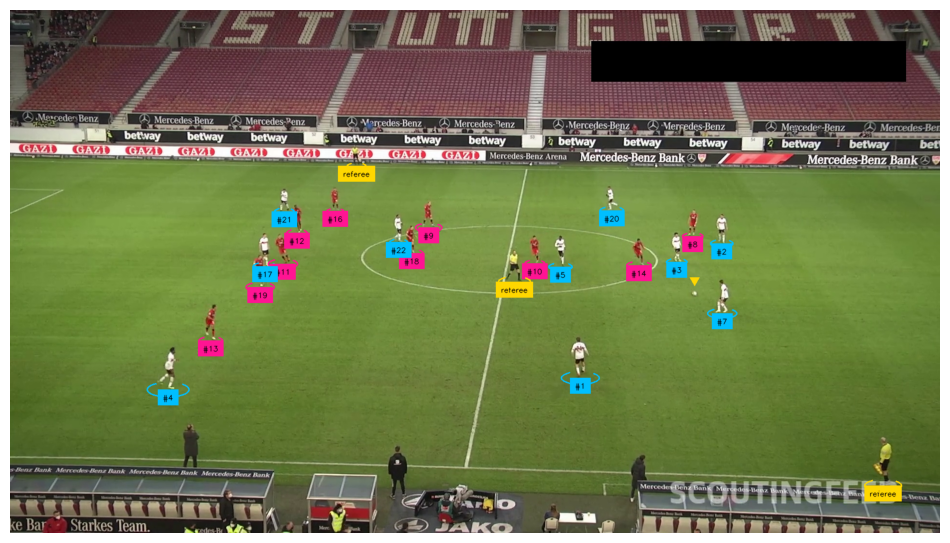

In [41]:
sv.plot_image(annotated_frame)